## Análisis y Visualización de datos

En el notebook visualización se utiliza la clase "Visualizador" para generar los gráficos solicitados en el proyecto

En esta sección se configura la variable del entorno python "sys.path" que es la lista de directorios donde python busca los módulos para importar. Lo anterior permite importar de visualización la clase visualizador. Adicionalmente se carga el `premier_clean.csv` (resultado del proceso EDA) y se inicializa la clase `Visualizador`, la cual encapsula la lógica para generar los gráficos requeridos.

In [1]:
# CELDAS 1 y 2
import pandas as pd
import sys
import os

# Ajustar el Path para importar la clase Visualizador
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src'))

# Importar la clase Visualizador
from src.visualizacion.visualizador import Visualizador

print("--- Carga del Dataset Limpio ---")

# RUTA
RUTA_CSV_CLEAN = "../src/data/processed/premier_clean.csv"


--- Carga del Dataset Limpio ---


## Carga del dataset limpio


In [2]:

try:
    # 1. Cargar el DataFrame
    df_limpio = pd.read_csv(RUTA_CSV_CLEAN)

    # Instanciar el objeto Visualizador para que la variable 'visualizador' exista.
    visualizador = Visualizador(df_limpio)

    print(f"DataFrame limpia cargada con {df_limpio.shape[0]} filas.")
    print("Objeto 'visualizador' instanciado y listo para generar gráficos.")

except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo limpio en la ruta: {RUTA_CSV_CLEAN}")

DataFrame limpia cargada con 4270 filas.
Objeto 'visualizador' instanciado y listo para generar gráficos.


## Generador de Gráficos
Esta sección ejecuta los métodos de la clase `Visualizador` para generar los gráficos requeridos, Histograma, Scatter plot, el top 10 de goleadores y un gráfico interactivo. Todos con sus respectivos títulos y requerimientos del proyecto.


--- 1. Histograma de Distribución de Goles ---


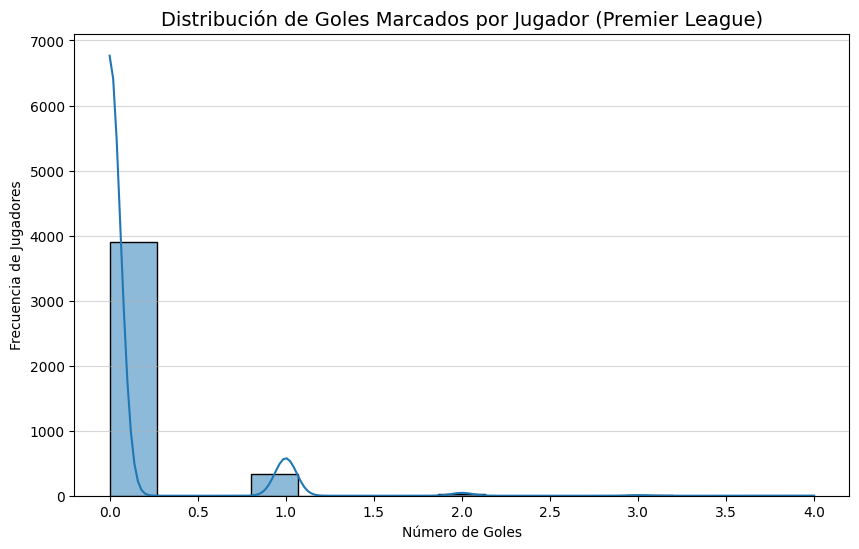

---Descripción---
La distribución de goles está fuertemente sesgada hacia el extremo inferior.
La mayoría de los jugadores tienen pocos o cero goles, indicando que la producción
Los jugadores defensivos como porteros, defensas y mediocampista defensivos tiene baja.
cuota goleadora, por otra parte se observa que los mediocampistas ofensivos tienden a dar.
más asistencias pero ya tienen cuota de gol, Los delanteros tiene más goles que asistencias .
-----------------------------


--- 2. Scatter Plot: Goles vs. Asistencias ---


C:\Users\eduar\OneDrive\Documentos\GitHub\Premier-League\src\visualizacion\visualizador.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_col, y=y_col, data=self.__dataFrame, palette='viridis', alpha=0.7)
C:\Users\eduar\OneDrive\Documentos\GitHub\Premier-League\src\visualizacion\visualizador.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Posición')


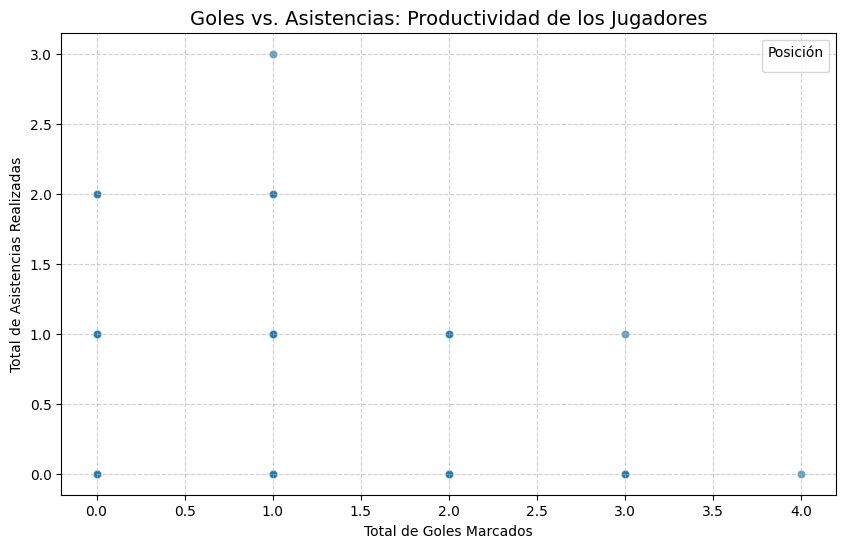

--- Descripción ---
Existe una correlación positiva moderada entre Goles y Asistencias, lo cual es
esperable en jugadores ofensivos. Los puntos más alejados (outliers superiores)
representan a los 'jugadores estrella' que dominan ambos métricas.
-----------------------------


--- 3. Top 10 Goleadores ---


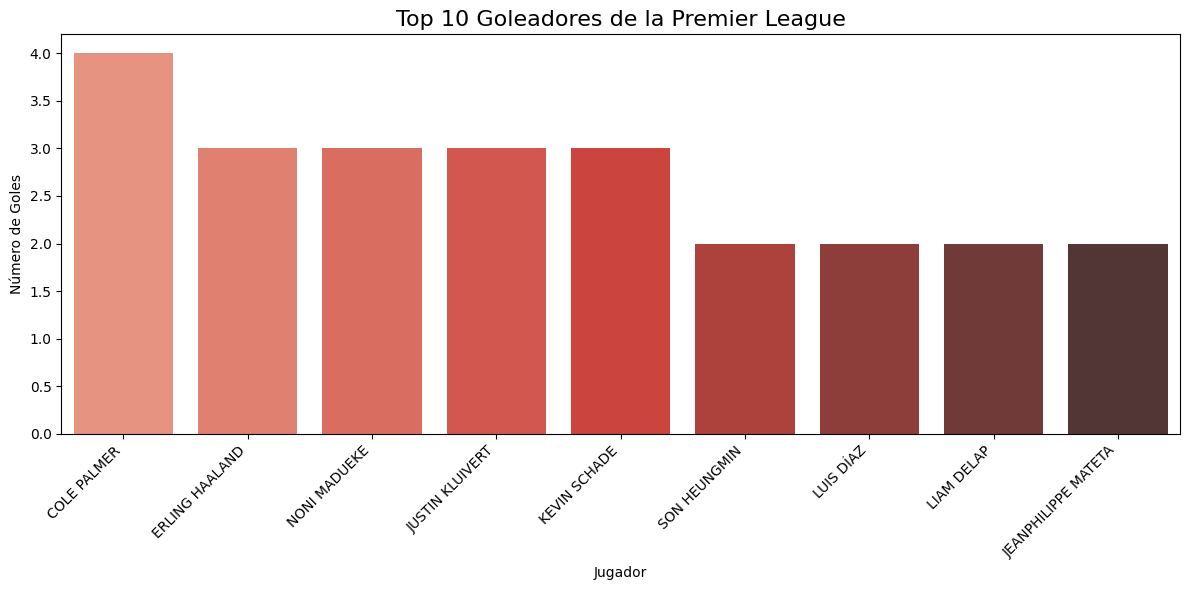

---Descripción---
El máximo goleador es COLE PALMER con 4 goles.
Este gráfico destaca a los delanteros de élite cuya alta producción individual impulsa a sus equipos.
-----------------------------


--- 4. Gráfico Interactivo (Plotly) ---


---Descripción---
Este gráfico permite a los analistas identificar de forma interactiva a jugadores
que anotan muchos goles con pocos minutos, lo que sugiere una alta eficiencia.
El último gráfico interactivo es crucial para tomar decisiones en un equipo
en muchas ocasiones se utiliza para cambiar la posición natural del jugador
Por ejemplo grandes jugadores han cambiado de posición con el paso del tiempo;
Messi era delantero en sus inicios, hoy juega de 10.
Siendo más específico el jugador Brendfort es un lateral que tiene 3 goles;
el técnico podría probar alinear al jugador en una posición más ofensiva
que igual sea por la banda, por ejemplo de extremo derecho o izquierdo.
-----------------------------


--- 5. Heatmap: Correlación de Eficiencia ---


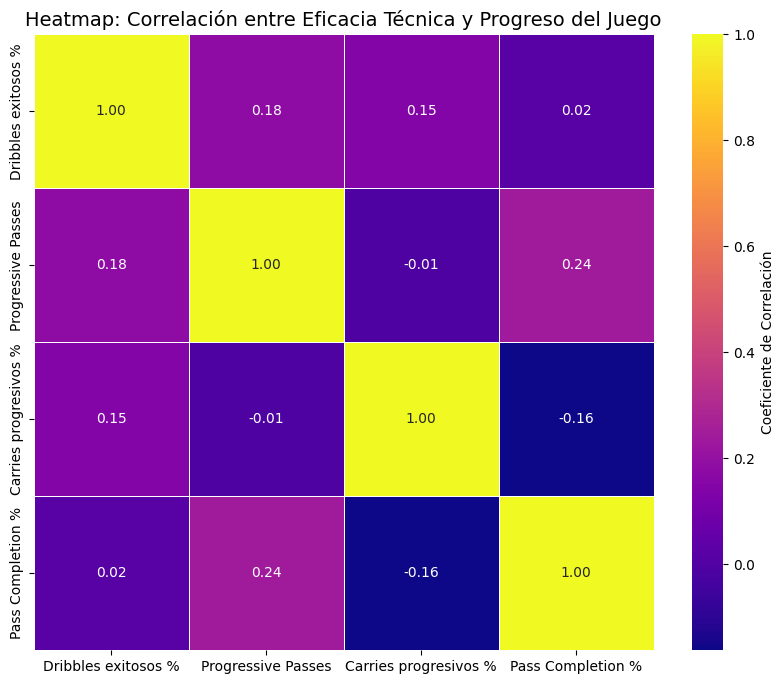


---Descripción---
Este gráfico identifica si la alta habilidad individual (Dribbles) se traduce en un avance efectivo del juego (Progressive Passes).
Una correlación fuerte (color intenso) sugiere que la habilidad individual es clave para la estrategia del equipo.
El análisis de correlación confirma que la precisión simple (Pass Completion %) es un factor independiente
Lo más revelador es la débil correlación entre la habilidad de regate (Dribbles exitosos %) y la progresión del juego
Esto sugiere que las decisiones tácticas del jugador (hacer un pase progresivo o una carrera progresiva) son un mejor predictor de la contribución estratégica
del jugador que su habilidad pura para regatear 
-----------------------------



In [3]:

# --- GENERACIÓN DE VISUALIZACIONES (Visualizador) ---

if 'df_limpio' in locals() and df_limpio is not None:

    # 1. Generar Histograma (Distribución de Goles - Requisito 1)
    print("\n--- 1. Histograma de Distribución de Goles ---")
    visualizador.generar_histograma_goles()

    # 2. Generar Scatter Plot (Correlación Goles vs. Asistencias - Requisito 2)
    print("\n--- 2. Scatter Plot: Goles vs. Asistencias ---")
    visualizador.generar_scatter_goles_asistencias()

    # 3. Generar Barras (Top Goleadores - Requisito Adicional/Demostrativo)
    print("\n--- 3. Top 10 Goleadores ---")
    visualizador.generar_top_10_goleadores()

    # 4. Generar Plotly (Gráfico Interactivo - Puntos Extra)
    print("\n--- 4. Gráfico Interactivo (Plotly) ---")
    visualizador.generar_interactivo_minutos_goles()
    # 5. Generar Heatmap (Análisis Avanzado)
    print("\n--- 5. Heatmap: Correlación de Eficiencia ---")
    visualizador.generar_heatmap_eficiencia()
else:
    print("\nNo se puede ejecutar la visualización: la DataFrame limpia no se cargó correctamente.")